# **Servo Prediction using Linear Regression**

---



## **Objective**

To predict the value of a variable based on the value of another variable.
1. Motor A,B,C,D,E
2. Screw A,B.C.D.E
3. Pgain 3,4,5,6
4. Vgain 1,2,3,4,5
5. Class 0.13 to 7.10

## **Data Source**



A data frame with 167 observations on 5 variables, 4 nominal and 1 as the target class. This data set is from a simulation of a servo system involving a servo amplifier, a motor, a lead screw/nut, and a sliding carriage of some sort. It may have been on of the translational axes of a robot on the 9th floor of the Al lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to a step change in a position set point.

## **Import Library**

In [136]:
import pandas as pd

In [137]:
import numpy as np

In [138]:
import matplotlib.pyplot as plt

## **Import Data**

In [139]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [140]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


## **Describe Data**

In [141]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [143]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [144]:
df.shape

(167, 5)

## **Data Visualization**

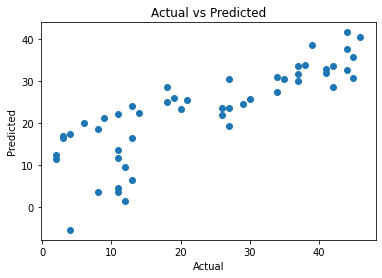

In [145]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

## **Data Preprocessing**

### **Get catagories & counts of catagorical values**

In [146]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [147]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

### **Get encoding of catagorical features**

In [148]:
df.replace({'Motor': {'A' :0, 'B' :1,'C' :2, 'D' :3,'E' :4}},inplace=True)

In [149]:
df.replace({'Screw': {'A' :0, 'B' :1,'C' :2, 'D' :3,'E' :4}},inplace=True)

## **Define Target Variable (y) and Feature Variables (X)**

In [150]:
y = df['Class']

In [151]:
y.shape

(167,)

In [152]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [153]:
X = df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [154]:
X = df.drop('Class', axis=1)

In [155]:
X.shape

(167, 4)

In [156]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


## **Train Test Split**

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2529)

In [159]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((116, 4), (51, 4), (116,), (51,))

## **Modeling**

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
lr = LinearRegression()

In [162]:
lr.fit(X_train, y_train)

LinearRegression()

## **Prediction**

In [163]:
y_pred = lr.predict(X_test)

In [164]:
y_pred.shape

(51,)

In [165]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

## **Model Evaluation**

In [166]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [167]:
mean_squared_error(y_test, y_pred)

66.03589175595563

In [168]:
mean_absolute_error(y_test, y_pred)

7.190539677251235

In [169]:
r2_score(y_test, y_pred)

0.6807245170563927

## **Future Predictions**

 **Lets select a random sample from existing dataset as new value**
 1. Extract a random row using sample function
 2. Seperate X & y
 3. Standarized X
 4. Predict

In [170]:
X_new = df.sample(1)

In [171]:
X_new

,Motor,Screw,Pgain,Vgain,Class
108,4,1,6,5,8


In [172]:
X_new.shape

(1, 5)

In [173]:
X_new = X_new.drop('Class', axis=1)

In [174]:
X_new

,Motor,Screw,Pgain,Vgain
108,4,1,6,5


In [175]:
X_new.shape

(1, 4)

In [176]:
y_pred_new = lr.predict(X_new)

In [177]:
y_pred_new

array([3.50411229])

## **Explaination**

The objective of the servo motor is to convert the control signal of the controller into the rotational angular displacement or angular velocity of the  motor output shaft.